In [25]:
# ini menggunakan Python 3 environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv("/content/drive/MyDrive/DBS_Terapan/fetal_health.csv")
df = df.rename(columns={
    'abnormal_short_term_variability': 'Abn. Short Var.',
    'mean_value_of_short_term_variability': 'Mean Short Var.',
    'percentage_of_time_with_abnormal_long_term_variability': 'Abn. Long Var. %',
    'mean_value_of_long_term_variability': 'Mean Long Var.'
})
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,Abn. Short Var.,Mean Short Var.,Abn. Long Var. %,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [28]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
Abn. Short Var.,0
Mean Short Var.,0
Abn. Long Var. %,0


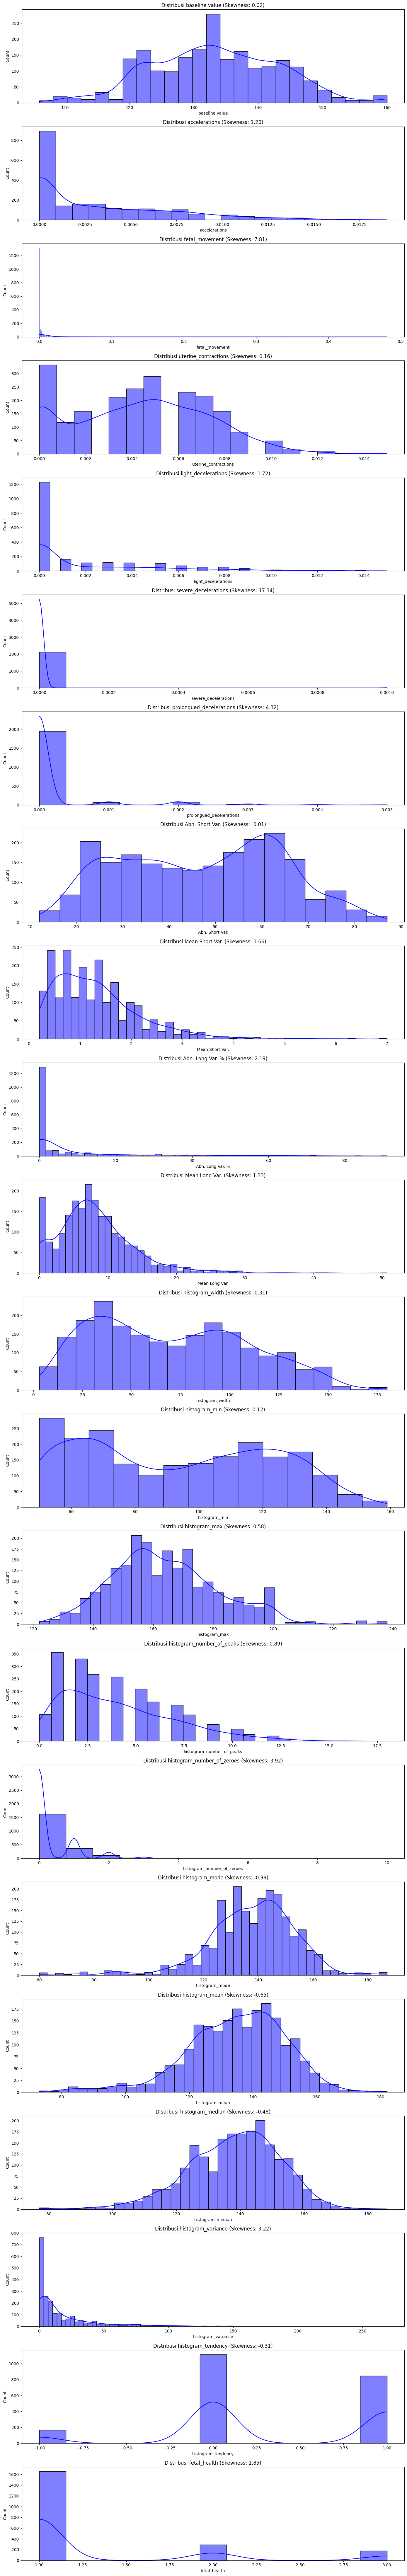

In [29]:
# Memilih kolom numerik
numerical_cols = df.select_dtypes(include='number').columns

# Mengatur grid subplots
plt.figure(figsize=(14, len(numerical_cols) * 4))

# Melakukan loop melalui setiap kolom numerik
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)

    # Menggambar kurva distribusi
    sns.histplot(df[col], kde=True, color='blue')

    # Menghitung skewness
    skewness_value = skew(df[col].dropna())

    # Menambahkan nilai skewness ke plot
    plt.title(f'Distribusi {col} (Skewness: {skewness_value:.2f})')

    # Mengatur layout untuk jarak yang lebih baik
    plt.tight_layout()

# Menampilkan plot
plt.show()


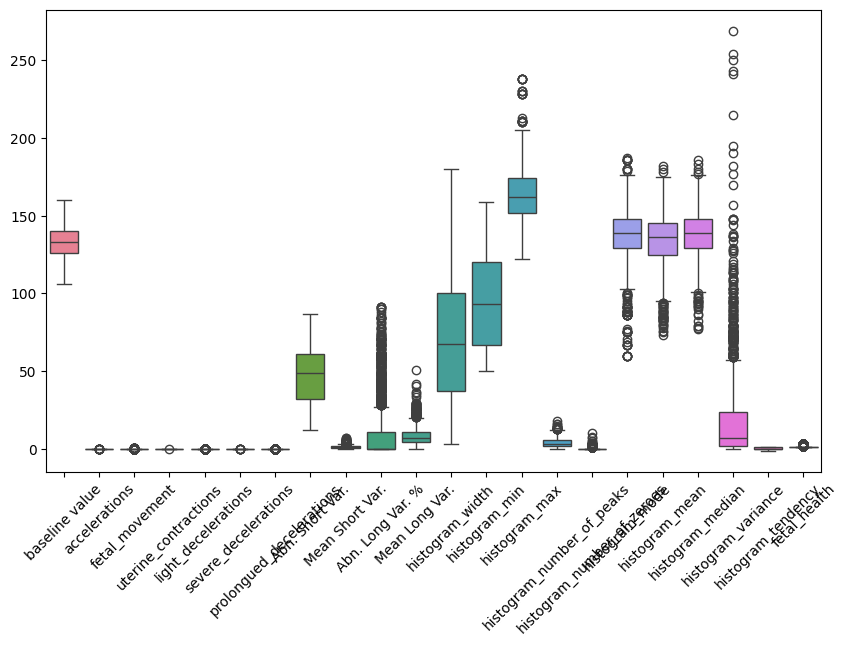

In [30]:
# Menetapkan ukuran gambar
plt.figure(figsize=(10, 6))

# Menggunakan fungsi boxplot dari Seaborn
sns.boxplot(data=df.select_dtypes(include='number'))

# Memutar label sumbu x jika perlu untuk keterbacaan yang lebih baik
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


### Inference:
Karena pengukuran berasal dari kardiotokogram yang merupakan alat medis yang tepat, outlier adalah pengukuran yang sah dan bukan kesalahan. Oleh karena itu, kita tetap mempertahankannya.


In [31]:
df['fetal_health'].value_counts()#.plot(kind = 'bar')
#plt.show()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


In [32]:
df['fetal_health']=df['fetal_health'].astype(str)

### Inference
terdapat imbalance pada kelas.

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop('fetal_health', axis = 1)
y = df['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.preprocessing import MinMaxScaler # Karena sebagian besar kolom tidak terdistribusi normal

mm = MinMaxScaler()
X_train_mm= mm.fit_transform(X_train)
X_test_mm = mm.fit_transform(X_test)

In [35]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

### Modeling w/o minmax scaling

In [36]:
def classification_model(model_name, X_train, X_test, y_train, y_test):
    # Inisialisasi model berdasarkan nama model
    if model_name == 'decision_tree':
        model = DecisionTreeClassifier()
    elif model_name == 'random_forest':
        model = RandomForestClassifier()
    else:
        raise ValueError("Nama model tidak dikenali.")

    # Melatih model pada data pelatihan
    model.fit(X_train, y_train)

    # Memprediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Mengembalikan metrik sebagai dictionary
    return {
        'Nama Model': model_name,
        'Akurasi': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_score': f1
    }

models = ['decision_tree', 'random_forest']
for model_name in models:
    for k, v in classification_model(model_name, X_train, X_test, y_train, y_test).items():
        print(k, " : ", v)
    print("\n")


Nama Model  :  decision_tree
Akurasi  :  0.9358974358974359
Precision  :  0.9377895593433114
Recall  :  0.9358974358974359
F1_score  :  0.9364839311016769


Nama Model  :  random_forest
Akurasi  :  0.9373219373219374
Precision  :  0.9354972348808243
Recall  :  0.9373219373219374
F1_score  :  0.9356736594055435




### Feature selection

In [37]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(X):
    """
    Hitung VIF untuk setiap fitur dalam DataFrame X.
    """
    X = add_constant(X)
    vif = pd.DataFrame()
    vif["Fitur"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.drop(index=0)  # Menghapus konstanta

def plot_vif(vif_df):
    """
    Plot nilai VIF menggunakan diagram batang.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x="VIF", y="Fitur", data=vif_df, palette="viridis")
    plt.title("Variance Inflation Factor (VIF) dari fitur")
    plt.xlabel("VIF")
    plt.ylabel("Fitur")
    plt.show()



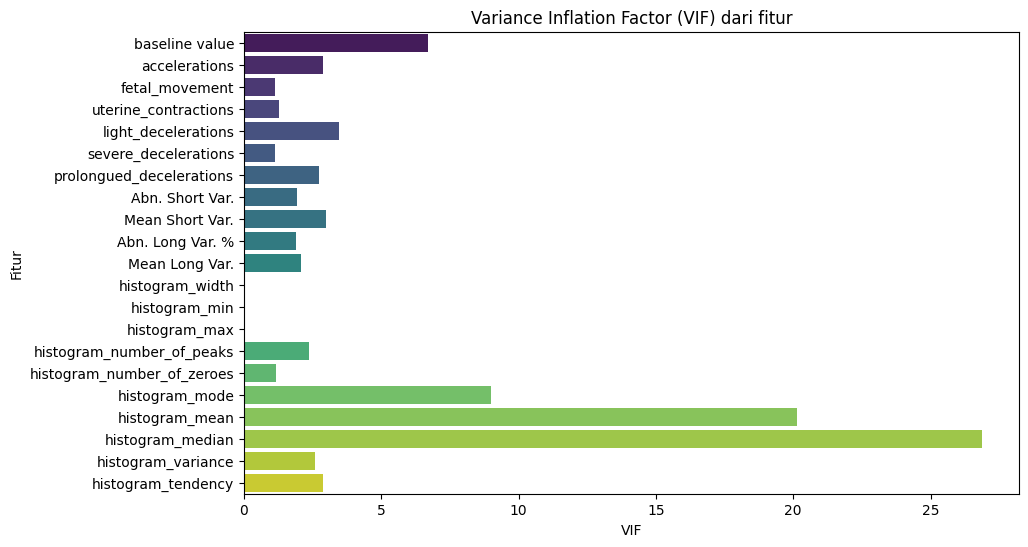

In [38]:
# memeriksa VIF untuk fitur-fitur.
# hapus variabel target jika termasuk dalam df.
X = df.drop(columns=['fetal_health'])

# Hitung VIF
vif_df = calculate_vif(X)

# Visualisasikan VIF
plot_vif(vif_df)



In [39]:
def remove_high_vif(X, threshold=10.0):
    """
    Secara iteratif menghapus fitur dengan VIF lebih besar dari ambang batas yang diberikan.
    """
    while True:
        vif = calculate_vif(X)
        max_vif = vif['VIF'].max()
        if max_vif > threshold:
            feature_to_remove = vif.sort_values('VIF', ascending=False)['Fitur'].iloc[0]
            print(f"Menghapus {feature_to_remove} dengan VIF = {max_vif}")
            X = X.drop(columns=[feature_to_remove])
        else:
            break
    return X

X_vif_adj = remove_high_vif(X, threshold=10.0)
y = df['fetal_health']
X_vif_train, X_vif_test, y_train, y_test = train_test_split(X_vif_adj, y, test_size=0.33, random_state=42)



Menghapus histogram_max dengan VIF = inf
Menghapus histogram_median dengan VIF = 26.872794394759012
Menghapus histogram_min dengan VIF = 18.4073576161742
Menghapus histogram_mean dengan VIF = 14.240546659659891


In [41]:
def classification_model_return(model_name, X_train, X_test, y_train, y_test):
    # Inisialisasi model berdasarkan nama model
    if model_name == 'decision_tree':
        model = DecisionTreeClassifier()
    elif model_name == 'random_forest':
        model = RandomForestClassifier()
    else:
        raise ValueError("Nama model tidak dikenali.")

    # Latih model dengan data pelatihan
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print({
        'Model': model_name,
        'Akurasi': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_score': f1
    })
    return model

dt = classification_model_return('decision_tree', X_train, X_test, y_train, y_test)


{'Model': 'decision_tree', 'Akurasi': 0.9301994301994302, 'Precision': 0.9294392050057915, 'Recall': 0.9301994301994302, 'F1_score': 0.9296060626911692}


## Modelling with minmax

In [42]:

models = ['decision_tree', 'random_forest']
for model_name in models:
    for k,v in classification_model(model_name, X_train_mm, X_test_mm, y_train, y_test).items():
        print(k," : ",v)
    print("\n")

Nama Model  :  decision_tree
Akurasi  :  0.9002849002849003
Precision  :  0.9029289993641
Recall  :  0.9002849002849003
F1_score  :  0.9014652150022044


Nama Model  :  random_forest
Akurasi  :  0.9387464387464387
Precision  :  0.9387464387464387
Recall  :  0.9387464387464387
F1_score  :  0.9387464387464387




In [43]:
from imblearn.over_sampling import SMOTE, ADASYN
adasyn = ADASYN(random_state=42)
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

X_train_mm_smote, y_train_mm_smote = smote.fit_resample(X_train_mm, y_train)
X_test_mm_smote, y_test_mm_smote = smote.fit_resample(X_test_mm, y_test)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = adasyn.fit_resample(X_test, y_test)

X_train_mm_adasyn, y_train_mm_adasyn = adasyn.fit_resample(X_train_mm, y_train)
X_test_mm_adasyn, y_test_mm_adasyn = adasyn.fit_resample(X_test_mm, y_test)

### Modeling with smote

In [44]:

models = ['decision_tree', 'random_forest']
for model_name in models:
    for k,v in classification_model(model_name, X_train_smote, X_test_smote, y_train_smote, y_test_smote).items():
        print(k," : ",v)
    print("\n")

Nama Model  :  decision_tree
Akurasi  :  0.9205776173285198
Precision  :  0.9210769216190582
Recall  :  0.9205776173285198
F1_score  :  0.9200811149209175


Nama Model  :  random_forest
Akurasi  :  0.944043321299639
Precision  :  0.9444791631811802
Recall  :  0.944043321299639
F1_score  :  0.9438388083100208




### Modeling with SMOTE+MM

In [45]:

models = ['decision_tree', 'random_forest']
for model_name in models:
    for k,v in classification_model(model_name, X_train_mm_smote, X_test_mm_smote, y_train_mm_smote, y_test_mm_smote).items():
        print(k," : ",v)
    print("\n")

Nama Model  :  decision_tree
Akurasi  :  0.8856799037304453
Precision  :  0.8861789003283709
Recall  :  0.8856799037304453
F1_score  :  0.8848133295882583


Nama Model  :  random_forest
Akurasi  :  0.9416365824308063
Precision  :  0.9414949904812365
Recall  :  0.9416365824308063
F1_score  :  0.9414942045344195




### Modeling with adasyn

In [46]:

models = ['decision_tree', 'random_forest']
for model_name in models:
    for k,v in classification_model(model_name, X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn).items():
        print(k," : ",v)
    print("\n")

Nama Model  :  decision_tree
Akurasi  :  0.8781664656212304
Precision  :  0.8780919850737252
Recall  :  0.8781664656212304
F1_score  :  0.8777141970529341


Nama Model  :  random_forest
Akurasi  :  0.9396863691194209
Precision  :  0.93980994218543
Recall  :  0.9396863691194209
F1_score  :  0.9392395044441774




### Modeling with mm+adasyn

In [47]:
models = ['decision_tree', 'random_forest']
for model_name in models:
    for k,v in classification_model(model_name, X_train_mm_adasyn, X_test_mm_adasyn, y_train_mm_adasyn, y_test_mm_adasyn).items():
        print(k," : ",v)
    print("\n")

Nama Model  :  decision_tree
Akurasi  :  0.8578342407743497
Precision  :  0.8577380040669821
Recall  :  0.8578342407743497
F1_score  :  0.8568389889505131


Nama Model  :  random_forest
Akurasi  :  0.9153055051421658
Precision  :  0.9172872745459886
Recall  :  0.9153055051421658
F1_score  :  0.915787621573923




In [48]:
def classification_model(model_name, X_train, X_test, y_train, y_test):
    # Inisialisasi model berdasarkan nama model
    if model_name == 'decision_tree':
        model = DecisionTreeClassifier()
    elif model_name == 'random_forest':
        model = RandomForestClassifier()
    else:
        raise ValueError("Nama model tidak dikenali.")

    # Melatih model pada data latih
    model.fit(X_train, y_train)

    # Memprediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print({
        'Model': model_name,
        'Akurasi': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_score': f1
    })
    return model

rfm = classification_model("random_forest", X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn)


{'Model': 'random_forest', 'Akurasi': 0.9372738238841978, 'Precision': 0.937146090492734, 'Recall': 0.9372738238841978, 'F1_score': 0.9370397013828571}


              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       554
         2.0       0.93      0.90      0.91       553
         3.0       0.94      0.96      0.95       551

    accuracy                           0.94      1658
   macro avg       0.94      0.94      0.94      1658
weighted avg       0.94      0.94      0.94      1658

Confusion Matrix:


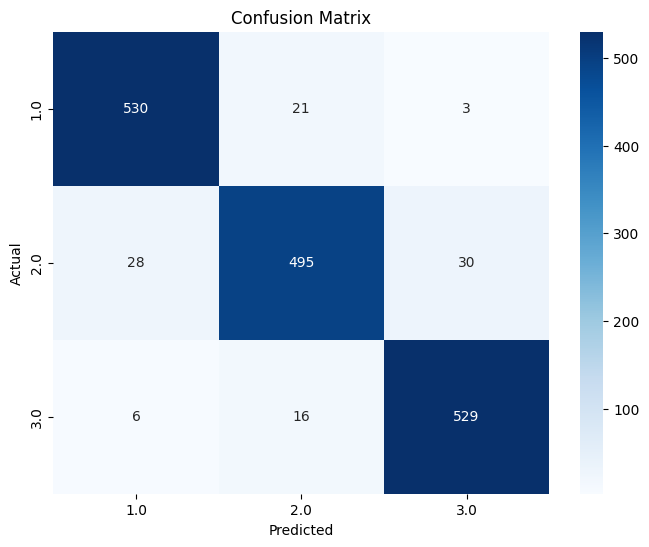

ROC Curve:


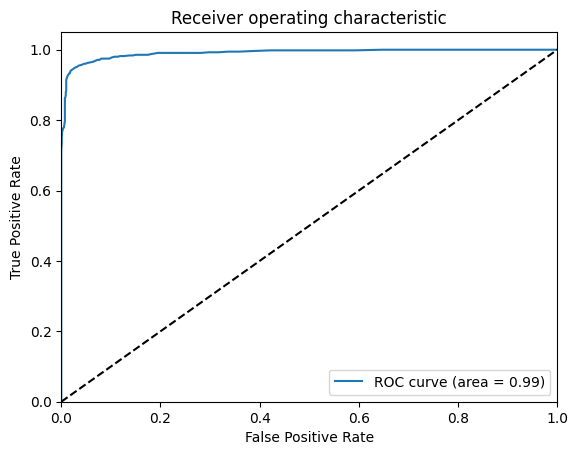

In [52]:
# X_test_adasyn and y_test_adasyn are your test data
y_pred = rfm.predict(X_test_adasyn)

# Classification Report
print(classification_report(y_test_adasyn, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test_adasyn, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rfm.classes_, yticklabels=rfm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# ROC AUC Score and Plot (For multi-class, it's a bit more complex)
y_test_bin = label_binarize(y_test_adasyn, classes=rfm.classes_)
y_pred_prob = rfm.predict_proba(X_test_adasyn)

n_classes = len(rfm.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])

# Plot of a ROC curve for a specific class
print("ROC Curve:")
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Top two contenders are adasyn and smote random forests models.

In [49]:
import pickle
import joblib
filepickle = '/content/drive/MyDrive/DBS_Terapan/kesehatan-janin-adasyn.pkl'
filejoblib = '/content/drive/MyDrive/DBS_Terapan/kesehatan-janin-adasyn.sav'

joblib.dump(rfm, filejoblib)
with open(filepickle, 'wb') as file:
    pickle.dump(rfm, file)